# Описание тестового стенда

Измерения проводились на ноутбуке HP Laptop 15s-eq2xxx:
- ОС: Ubuntu 22.04;
- Процессор: AMD Ryzen 5 5500U with Radeon Graphics, 2100 МГц, ядер: 6, логических процессоров: 12;
- ОЗУ: 8Гб.

Были закрыты все приложения, был подключен к питанию ноутбук, сделан bash-скрипт, который чистил кэш и запускал программу на данных. Программа была скомпилирована в release mode (dotnet build -c release)

# Датасет

In [7]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [8]:
with open("measure1.txt") as file:
    t = [int(x) for x in file]
print(t)


[6572, 6582, 6582, 6839, 6823, 6793, 6778, 6555, 6786, 6620, 6681, 6759, 6772, 6651, 6716, 6562, 6889, 6751, 6919, 6943, 6655, 6827, 6520, 6782, 6641, 6820, 6662, 6614, 6837, 6706, 6791, 6609, 6709, 6633, 6644, 6706, 6580, 6613, 6750, 6784]


# Гистограмма

(array([3., 4., 7., 4., 4., 4., 6., 5., 1., 2.]),
 array([6520. , 6562.3, 6604.6, 6646.9, 6689.2, 6731.5, 6773.8, 6816.1,
        6858.4, 6900.7, 6943. ]),
 <BarContainer object of 10 artists>)

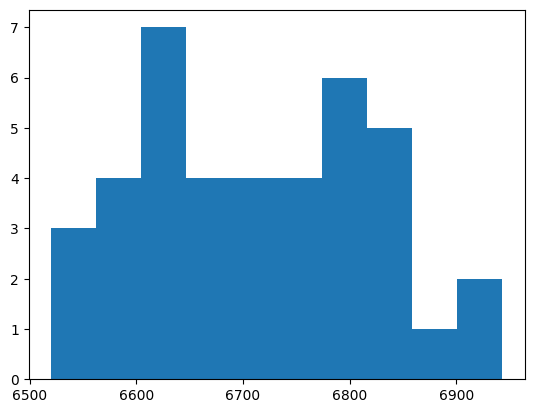

In [9]:
plt.hist(t)

# Нормальность

In [10]:
normaltest = stats.normaltest(t)
shapirotest = stats.shapiro(t)
print(f'Normaltest p-value: {normaltest[1]}')
print(f'Shapirotest p-value: {shapirotest[1]}')
if normaltest[1] > 0.05 or shapirotest[1]:
    print("Тест на нормальность пройден (p-value > 0.05 хоть на одном из тестов)")
else: 
    print("Тест на нормальность не пройден (p-value < 0.05 на обоих тестах)")

Normaltest p-value: 0.2670790537270199
Shapirotest p-value: 0.29503360390663147
Тест на нормальность пройден (p-value > 0.05 хоть на одном из тестов)


# Среднее и стандартное отклонение

In [11]:
mean = np.mean(t)
print(f'Среднее: {mean}')

Среднее: 6711.4


In [12]:
std = np.std(t, ddof=1)
print(f'Стандартное отклонение: {std}')

Стандартное отклонение: 108.33585006938567


In [13]:
print(f'Стандартное отклонение {round(std/mean * 100)}% от среднего')

Стандартное отклонение 2% от среднего


# Доверительный интервал

In [18]:
conf = stats.t.ppf(0.975, df=len(t)-1)*stats.sem(t)
print(f'Погрешность: {conf}')

Погрешность: 34.647485594091485


In [15]:
rounded_conf = round(conf, -1) / 1000
print(f'Округленный доверительный интервал (в секундах): {rounded_conf}')
rounded_mean_conf = round(mean, -1) / 1000
print(f'Округленное среднее (в секундах): {rounded_mean_conf}')
print(f'95% Доверительный интервал: {rounded_mean_conf} ± {rounded_conf}')

Округленный доверительный интервал (в секундах): 0.03
Округленное среднее (в секундах): 6.71
95% Доверительный интервал: 6.71 ± 0.03


# Предсказывающий интервал


In [19]:
pred = std * 2
print(f'Погрешность: {pred}')

Погрешность: 216.67170013877134


In [17]:
rounded_pred = round(pred, -2) / 1000
print(f'Округленный предсказывающий интервал (в секундах): {rounded_pred}')
rounded_mean_pred = round(mean, -2) / 1000
print(f'Округленное среднее (в секундах): {rounded_mean_pred}')
print(f'95% Предсказывающий интервал: {rounded_mean_pred} ± {rounded_pred}')

Округленный предсказывающий интервал (в секундах): 0.2
Округленное среднее (в секундах): 6.7
95% Предсказывающий интервал: 6.7 ± 0.2
